# Chapter 5 

## Clustree2

```{mermaid}

graph TD;
    N0["Model"];

    L1["(16, 14, 9.7)"];
    L2["(45, 30, 22)"];
    L3["(1, 0, 5)"];
    L4["(9, 5, 2)"];
    L5["(3.3, 0, 4.3)"];

    N0 -- "=A100" --> L1;
    N0 -- "=B3" --> L2;
    N0 -- "=E122" --> L3;
    N0 -- "=M102" --> L4;
    N0 -- "=T202" --> L5;



```

## Dolphins DL Left

```{mermaid}

graph TD;
    N1["Gills"];
    N2["Beak"];
    N3["Length"];
    N4["Teeth"];
    N5["Length"];

    N1 -- "=yes" --> L1["+ve: 0\n -ve: 4"];
    N1 -- "=no" --> N2;
    N2 -- "=no" --> L2["+ve: 0\n -ve: 0"];
    N2 -- "=yes" --> N3;
    N3 -- "≠[3,5]" --> L3["+ve: 1\n -ve: 1"];
    N3 -- "=[3,5]" --> N4;
    N4 -- "=many" --> L4["+ve: 2\n -ve: 0"];
    N4 -- "=few" --> N5;
    N5 -- "=3" --> L6["+ve: 1\n -ve: 0"];
    N5 -- "=5" --> L5["+ve: 1\n -ve: 0"];


```

## Dolphins DL Right

```{mermaid}

graph TD;
    N1["Gills"];
    N2["Length"];
    N3["Teeth"];

    N1 -- "=yes" --> L1["ĉ(x) = -ve"];
    N1 -- "=no" --> N2;
    N2 -- "=5" --> L3["ĉ(x) = +ve"];
    N2 -- "=3" --> L2["ĉ(x) = +ve"];
    N2 -- "=4" --> N3;
    N3 -- "=few" --> L4["ĉ(x) = -ve"];
    N3 -- "=many" --> L5["ĉ(x) = +ve"];

```

## Dolphins DT

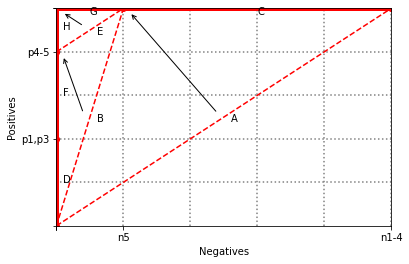

In [1]:
import matplotlib.pyplot as plt

x = [0, 0, 0, 0, 100, 500]
y = [0, 200, 400, 500, 500, 500]

h = 500
w = 500
grid_step = 100

fig, ax = plt.subplots()
ax.set_xlim(0, w)
ax.set_ylim(0, h)

ax.set_xticks(x)
ax.set_xticklabels(['', '', '', '', 'n5', 'n1-4'])
ax.set_yticks(y)
ax.set_yticklabels(['', 'p1,p3', 'p4-5', 'p1', '', ''])

gx = grid_step
while gx <= w:
    ax.axvline(x=gx, color='gray', linestyle='dotted')
    gx += grid_step

gy = grid_step
while gy <= h:
    ax.axhline(y=gy, color='gray', linestyle='dotted')
    gy += grid_step

ax.text((x[0] + x[5]) / 2 + 10, (y[0] + y[5]) / 2 - 10, "A")
ax.text((x[0] + x[4]) / 2 + 10, (y[0] + y[4]) / 2 - 10, "B")
ax.text((x[4] + x[5]) / 2, y[5] - 15, "C")
ax.text(x[1] + 10, (y[0] + y[1]) / 2, "D")
ax.text((x[2] + x[4]) / 2 + 10, (y[2] + y[4]) / 2 - 10, "E")
ax.text(x[2] + 10, (y[1] + y[2]) / 2, "F")
ax.text((x[3] + x[4]) / 2, y[4] - 15, "G")
ax.text(x[3] + 10, (y[2] + y[3]) / 2, "H")

ax.annotate('', xy=(x[4] + 10, y[4] - 10), xytext=((x[0] + x[5]) / 2 - 10, (y[0] + y[5]) / 2 + 10),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(x[2] + 10, y[2] - 10), xytext=((x[0] + x[4]) / 2 - 10, (y[0] + y[4]) / 2 + 10),
            arrowprops=dict(arrowstyle='->'))
ax.annotate('', xy=(x[3] + 10, y[3] - 10), xytext=((x[2] + x[4]) / 2 - 10, (y[2] + y[4]) / 2 + 10),
            arrowprops=dict(arrowstyle='->'))

ax.plot(x, y, linewidth=5, color='red', marker='o')

ax.plot([x[0], x[5]], [y[0], y[5]], linestyle='dashed', color='red')
ax.plot([x[0], x[4]], [y[0], y[4]], linestyle='dashed', color='red')
ax.plot([x[2], x[4]], [y[2], y[4]], linestyle='dashed', color='red')

ax.set_xlabel("Negatives")
ax.set_ylabel("Positives")

plt.show()

```{mermaid}

graph TD;
    L2["D: [2+, 0−]"]:::filled
    N1["A: Gills"]
    N2["B: Length"]
    N3["E: Teeth"]
    L1["C: [0+, 4−]"]:::filled
    L3["F: [2+, 0−]"]:::filled
    L4["G: [0+, 1−]"]:::filled
    L5["H: [1+, 0−]"]:::filled

    N1 -- "=no" --> N2
    N1 -- "=yes" --> L1
    N2 -- "=5" --> L3
    N2 -- "=3" --> L2
    N2 -- "=4" --> N3
    N3 -- "=few" --> L4
    N3 -- "=many" --> L5

    classDef filled fill:#f0f0f0,stroke:#000,stroke-width:1px;


```

## DT Cost

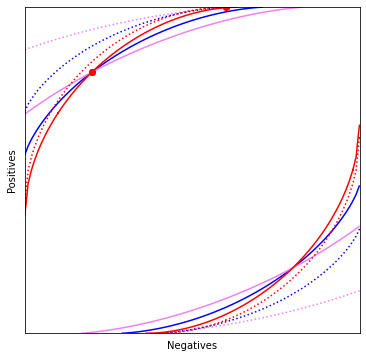

In [2]:
import numpy as np
import matplotlib.pyplot as plt

c = 10
pos = c * 100
neg = 100

def rocgrid():
    plt.figure(figsize=(6, 6))
    plt.xlim(0, neg)
    plt.ylim(0, pos)
    plt.xlabel("Negatives")
    plt.ylabel("Positives")
    plt.grid(True, which='both', color='gray', linewidth=0.5)
    plt.xticks([])
    plt.yticks([])

def entropy(P, N):
    if P == 0 or N == 0:
        return 0
    p = P / (P + N)
    n = N / (P + N)
    return -p * np.log2(p) - n * np.log2(n)

def gini(P, N):
    if P + N == 0:
        return 0
    p = P / (P + N)
    n = N / (P + N)
    return 4 * p * n

def dkm(P, N):
    if P + N == 0:
        return 0
    p = P / (P + N)
    n = N / (P + N)
    return 2 * np.sqrt(p * n)

def metric(tp, fp, m):
    if tp + fp == 0:
        return 0
    Pos = pos
    Neg = neg
    N = Pos + Neg
    TP = tp
    FP = fp
    FN = Pos - TP
    TN = Neg - FP
    if m == 'accuracy': return (TP + TN) / N
    if m == 'wracc': return TP / N - (TP + FP) * (TP + FN) / N ** 2
    if m == 'confirmation':
        base = (TP + FP) * (FP + TN) / N ** 2
        return (base - FP / N) / (np.sqrt(base) - base) if base != 0 else 0
    if m == 'generality': return (TP + FP) / N
    if m == 'precision': return TP / (TP + FP)
    if m == 'laplace-precision': return (TP + 1) / (TP + FP + 2)
    if m == 'f-measure': return 2 * TP / (2 * TP + FP + FN)
    if m == 'g-measure': return TP / (FP + Pos)
    if m == 'precision*recall': return TP ** 2 / ((TP + FP) * (TP + FN))
    if m == 'avg-precision-recall': return TP / (2 * (TP + FP)) + TP / (2 * (TP + FN))
    if m == 'aucsplit': return (TP * Neg + Pos * TN) / (2 * Pos * Neg)
    if m == 'balanced-aucsplit': return TP / Pos - FP / Neg
    if m == 'chi2':
        num = (TP * TN - FP * FN) ** 2
        den = (TP + FP) * (TP + FN) * (FP + TN) * (FN + TN)
        return num / den if den != 0 else 0
    if m == 'info-gain': return entropy(Pos, Neg) - (TP + FP) / N * entropy(TP, FP) - (FN + TN) / N * entropy(FN, TN)
    if m == 'gini': return gini(Pos, Neg) - (TP + FP) / N * gini(TP, FP) - (FN + TN) / N * gini(FN, TN)
    if m == 'dkm': return dkm(Pos, Neg) - (TP + FP) / N * dkm(TP, FP) - (FN + TN) / N * dkm(FN, TN)
    if m == 'entropy': return (TP + FP) / N * entropy(TP, FP)
    if m == 'giniimp': return (TP + FP) / N * gini(TP, FP)
    if m == 'dkmimp': return dkm(TP, FP)
    return 0

x = np.arange(0, neg + 1)
y = np.arange(0, pos + 1)
z = np.zeros((len(y), len(x)))

save = False
colour1 = "red" if not save else "black"
colour2 = "blue" if not save else "black"

def contours(m, method):
    for i in range(len(x)):
        for j in range(len(y)):
            z[j, i] = metric(y[j], x[i], m)
    plt.contour(x, y, z, levels=10, colors=colour1, linestyles="solid")

def contour1(m, col, lty, tp, fp):
    for i in range(len(x)):
        for j in range(len(y)):
            z[j, i] = metric(y[j], x[i], m)
    v = metric(tp, fp, m)
    plt.plot(fp, tp, 'o', color=col)
    plt.contour(x, y, z, levels=[v], colors=col, linestyles=lty)

def plotmetric(m, method):
    rocgrid()
    contours(m, method)
    if save:
        plt.savefig(f"{m}.png", dpi=300)

def plotmetrics():
    plotmetric('accuracy', "edge")
    plotmetric('precision', "edge")
    plotmetric('f-measure', "edge")
    plotmetric('precision*recall', "edge")
    plotmetric('info-gain', "flattest")
    plotmetric('gini', "flattest")
    plotmetric('dkm', "flattest")

p1 = c * 80
n1 = 20
p2 = c * 100
n2 = 60

rocgrid()
contour1('info-gain', 'blue', 'solid', p1, n1)
contour1('info-gain', 'blue', 'dotted', p2, n2)
contour1('gini', 'violet', 'solid', p1, n1)
contour1('gini', 'violet', 'dotted', p2, n2)
contour1('dkm', 'red', 'solid', p1, n1)
contour1('dkm', 'red', 'dotted', p2, n2)

plt.show()

## Growtree

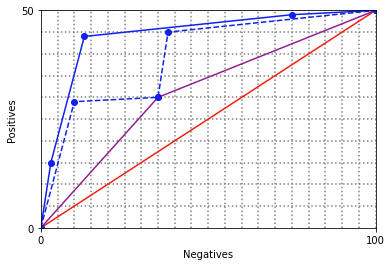

In [3]:
import matplotlib.pyplot as plt

h = 500
w = 1000
grid_step = 50

fig, ax = plt.subplots()
ax.set_xlim(0, w)
ax.set_ylim(0, h)
ax.set_xlabel("Negatives")
ax.set_ylabel("Positives")
ax.set_xticks([])
ax.set_yticks([])

p0 = 500
n0 = 1000
p1 = 300
n1 = 350

y0 = [0, p0]
x0 = [0, n0]
y1 = [0, p1, p0]
x1 = [0, n1, n0]
y3 = [0, 290, p1, 450, p0]
x3 = [0, 100, n1, 380, n0]
y4 = [0, 150, 440, 490, p0]
x4 = [0, 30, 130, 750, n0]

ax.set_yticks(y0)
ax.set_yticklabels(['0', '50'])
ax.set_xticks(x0)
ax.set_xticklabels(['0', '100'])

gx = grid_step
while gx <= w:
    ax.axvline(gx, color='gray', linestyle='dotted')
    gx += grid_step

gy = grid_step
while gy <= h:
    ax.axhline(gy, color='gray', linestyle='dotted')
    gy += grid_step

def rgb(r, g, b):
    return (r/255, g/255, b/255)

ax.plot(x0, y0, linestyle='-', marker='o', color=rgb(240, 32, 16))
ax.plot(x1, y1, linestyle='-', marker='o', color=rgb(144, 32, 144))
ax.plot(x3, y3, linestyle='--', marker='o', color=rgb(16, 32, 240))
ax.plot(x4, y4, linestyle='-', marker='o', color=rgb(16, 32, 240))

plt.show()


```{mermaid}

graph TD;
    N0["[50+, 100−]"]:::red
    N11["[30+, 35−]"]:::purple
    N12["[20+, 65−]"]:::purple
    N21["[29+, 10−]"]:::blue
    N22["[1+, 25−]"]:::blue
    N31["[15+, 3−]"]:::blue
    N32["[5+, 62−]"]:::blue

    N0 -- "(1)" --> N11
    N0 --> N12
    N11 -- "(2)" --> N21
    N11 --> N22
    N12 -- "(3)" --> N31
    N12 --> N32

    classDef red fill:#f04030,stroke:#000,stroke-width:1px;
    classDef purple fill:#804080,stroke:#000,stroke-width:1px;
    classDef blue fill:#1040f0,stroke:#000,stroke-width:1px;



```

## Labelings

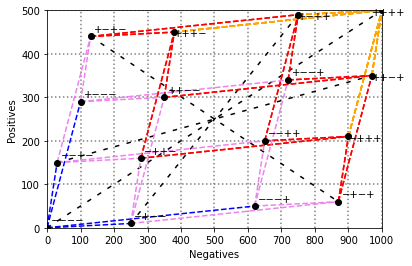

In [4]:
import matplotlib.pyplot as plt

h = 500
w = 1000
grid_step = 100

fig, ax = plt.subplots()
ax.set_xlim(0, w)
ax.set_ylim(0, h)
ax.set_xlabel("Negatives")
ax.set_ylabel("Positives")

x = [100, 250, 30, 620]
y = [290, 10, 150, 50]

ax.set_xticks(range(0, w + 1, grid_step))
ax.set_yticks(range(0, h + 1, grid_step))
ax.set_xticklabels(range(0, w + 1, grid_step))
ax.set_yticklabels(range(0, h + 1, grid_step))

for gx in range(grid_step, w + 1, grid_step):
    ax.axvline(gx, color='gray', linestyle='dotted')
for gy in range(grid_step, h + 1, grid_step):
    ax.axhline(gy, color='gray', linestyle='dotted')

ax.plot([0, w], [0, h], linestyle=(0, (3, 5)), color='black')  # linha tracejada tipo lty=3

def sum_coords(arr, indices):
    return sum(arr[i] for i in indices)

ax.plot([x[2], sum_coords(x, [0,1,3])], [y[2], sum_coords(y, [0,1,3])], linestyle=(0, (3,5)), color='black')
ax.plot([sum_coords(x, [0,2]), sum_coords(x, [1,3])], [sum_coords(y, [0,2]), sum_coords(y, [1,3])], linestyle=(0, (3,5)), color='black')
ax.plot([sum_coords(x, [0,2,3]), x[1]], [sum_coords(y, [0,2,3]), y[1]], linestyle=(0, (3,5)), color='black')

for i in range(4):
    ax.plot([0, x[i]], [0, y[i]], linestyle='dashed', color='blue')
    for j in range(4):
        if j != i:
            ax.plot([x[i], x[i] + x[j]], [y[i], y[i] + y[j]], linestyle='dashed', color='violet')
            for k in range(4):
                if k != i and k != j:
                    ax.plot([x[i] + x[j], x[i] + x[j] + x[k]], [y[i] + y[j], y[i] + y[j] + y[k]], linestyle='dashed', color='red')
                    for l in range(4):
                        if l != i and l != j and l != k:
                            ax.plot([x[i] + x[j] + x[k], w], [y[i] + y[j] + y[k], h], linestyle='dashed', color='orange')

points_labels = [
    (0, 0, "−−−−"),
    (x[0], y[0], "+−−−"),
    (x[1], y[1], "−+−−"),
    (x[2], y[2], "−−+−"),
    (x[3], y[3], "−−−+"),
    (x[0] + x[1], y[0] + y[1], "++−−"),
    (x[0] + x[2], y[0] + y[2], "+−+−"),
    (x[0] + x[3], y[0] + y[3], "+−−+"),
    (x[1] + x[2], y[1] + y[2], "−++−"),
    (x[1] + x[3], y[1] + y[3], "−+−+"),
    (x[2] + x[3], y[2] + y[3], "−−++"),
    (x[0] + x[1] + x[2], y[0] + y[1] + y[2], "+++−"),
    (x[0] + x[1] + x[3], y[0] + y[1] + y[3], "++−+"),
    (x[0] + x[2] + x[3], y[0] + y[2] + y[3], "+−++"),
    (x[1] + x[2] + x[3], y[1] + y[2] + y[3], "−+++"),
    (w, h, "++++")
]

for (px, py, label) in points_labels:
    ax.plot(px, py, marker='o', color='black')
    if label == "++++":
        ax.text(px - 30, py - 10, label)
    elif label in ["+++−", "++−+", "+−++", "−+++"]:
        ax.text(px, py - 10, label)
    else:
        ax.text(px + 10, py + 10, label)

plt.show()

## Prunedtree

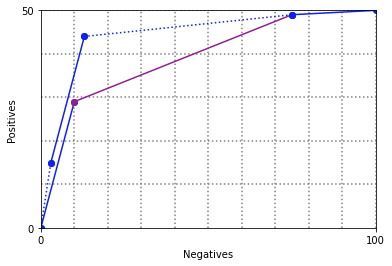

In [5]:
import matplotlib.pyplot as plt

h = 500
w = 1000
grid_step = 100

fig, ax = plt.subplots()
ax.set_xlim(0, w)
ax.set_ylim(0, h)
ax.set_xlabel("Negatives")
ax.set_ylabel("Positives")

p0 = 500
n0 = 1000
p1 = 300
n1 = 350

y0 = [0, p0]
x0 = [0, n0]
y1 = [0, p1, p0]
x1 = [0, n1, n0]
y3 = [0, 290, p1, 450, p0]
x3 = [0, 100, n1, 380, n0]
y4 = [0, 150, 440, 490, p0]
x4 = [0, 30, 130, 750, n0]

ax.set_yticks(y0)
ax.set_yticklabels(['0', '50'])
ax.set_xticks(x0)
ax.set_xticklabels(['0', '100'])

gx = grid_step
while gx <= w:
    ax.axvline(gx, color="gray", linestyle="dotted")
    gx += grid_step

gy = grid_step
while gy <= h:
    ax.axhline(gy, color="gray", linestyle="dotted")
    gy += grid_step

ax.plot([0, 100], [0, 290], linestyle='-', marker='o', color=(16/255,32/255,240/255))
ax.plot([100, 750], [290, 490], linestyle='-', marker='o', color=(144/255,32/255,144/255))
ax.plot([750, 1000], [490, 500], linestyle='-', marker='o', color=(16/255,32/255,240/255))

ax.plot([0, 30], [0, 150], linestyle=':', marker='o', color=(16/255,32/255,240/255))
ax.plot([30, 130], [150, 440], linestyle='-', marker='o', color=(16/255,32/255,240/255))
ax.plot([130, 750], [440, 490], linestyle=':', marker='o', color=(16/255,32/255,240/255))

plt.show()

```{mermaid}

graph TD;
    N0["[50+, 100−]"]:::red
    N11["[30+, 35−]"]:::purple
    N12["[20+, 65−]"]:::purple
    N21["[29+, 10−]"]:::blue
    N22["[1+, 25−]"]:::blue
    N31["[15+, 3−]"]:::dottedBlue
    N32["[5+, 62−]"]:::dottedBlue

    N0 --> N11
    N0 --> N12
    N11 --> N21
    N11 --> N22
    N12 -.-> N31
    N12 -.-> N32

    classDef red fill:#f04030,stroke:#000,stroke-width:1px;
    classDef purple fill:#804080,stroke:#000,stroke-width:1px;
    classDef blue fill:#1040f0,stroke:#000,stroke-width:1px;
    classDef dottedBlue fill:#1040f0,stroke:#000,stroke-dasharray:3,stroke-width:1px;


```

## Regtree

```{mermaid}

graph TD;
    N0["Model"];
    N11["Leslie"];
    N12["Leslie"];

    L1["f̂(x)=4513"];
    L2["f̂(x)=77"];
    L3["f̂(x)=870"];
    L4["f̂(x)=1900"];
    L5["f̂(x)=1411"];
    L6["f̂(x)=625"];
    L7["f̂(x)=185"];

    N0 -- "=A100" --> N11;
    N0 -- "=B3" --> L1;
    N0 -- "=E122" --> L2;
    N0 -- "=M102" --> L3;
    N0 -- "=T202" --> N12;

    N11 -- "=yes" --> L4;
    N11 -- "=no" --> L5;
    
    N12 -- "=yes" --> L6;
    N12 -- "=no" --> L7;


```